# CH03. 선형 회귀 실습

## 실습 순서

0. 사용할 라이브러리와 패키지 불러오기

1.  (데이터) 데이터 불러오기
2.  (데이터) 학습 데이터와 테스트 데이터 구분하기
3. (모델) 모델 구성하기
4. (모델 학습) 모델 학습하기
5. (모델 성능 평가) 모델 성능 평가하기
6. (결과) 모델 동작 시각화하기

## [실습 3-1] scikit-learn 라이브러리를 이용한 선형 회귀 모델




### 0. 사용할 라이브러리와 패키지 불러오기




In [19]:
# numpy, matplotlib, pandas를 각각 np, plt, pd로 재지정해 불러온다.
# scikit-learn에서 사용할 패키지를 불러온다.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1. 데이터 불러오기




In [20]:
# 데이터(Salary_Data,csv)를 불러온다.
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values # iloc 함수로 데이터셋의 특징 벡터를 X에 저장
y = dataset.iloc[:, 1].values # iloc 함수로 데이터셋의 실제값을 y에 저장

### 2. 학습 데이터와 테스트 데이터 구분하기




In [21]:
# X(특징 벡터)와 y(실제값)을 학습 데이터셋과 테스트 데이터셋으로 분할한다.
# test_size를 통해 학습 데이터와 테스트 데이터의 비율을 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

### 3. 모델 구성하기




In [22]:
# scikit-learn 라이브러리의 선형 회귀 모델을 불러온다.
regressor = LinearRegression()

### 4. 모델 학습하기




In [23]:
# fit 함수를 통해 모델을 학습한다.
# fit 함수에는 1) 가중치 초기화 2) 손실 함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
regressor.fit(X_train, y_train) # 학습 단계에서는 학습 데이터만 사용됨
w_1 = regressor.coef_
w_0 = regressor.intercept_
print(w_1)
print(w_0)

[9303.86584319]
25669.527491908324


### 5. 모델 성능 평가하기




In [24]:
# predict 함수를 통해 선형 회귀로 얻은 예측값을 추출해 테스트 데이터로 평가한다.
y_pred = regressor.predict(X_test) # 예측 단계에서는 테스트 데이터만 사용됨
result = mean_squared_error(y_test, y_pred)
print(result)

53668975.62020731


### 6. 모델 동작 시각화하기




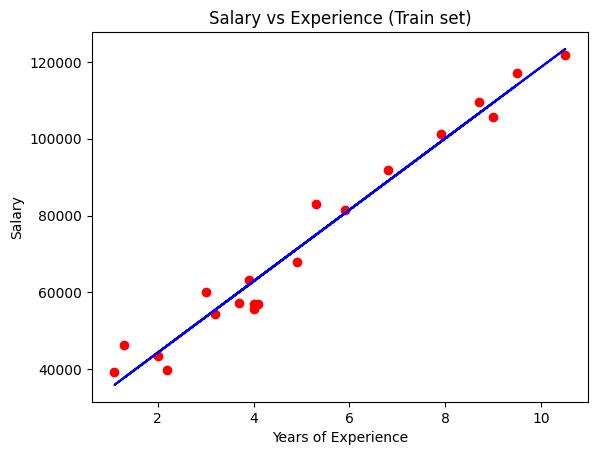

In [25]:
# 학습 데이터셋을 시각화한다(빨간색).
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

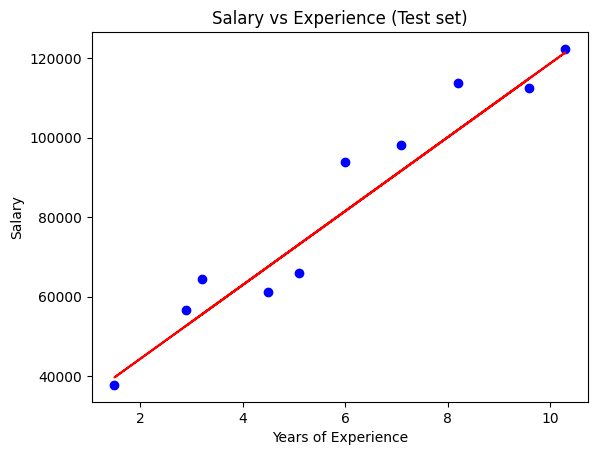

In [26]:
# 테스트 데이터셋을 시각화한다(파란색).
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## [실습 3-2] 함수를 직접 정의해 구현한 선형 회귀 모델




### 1. 데이터 불러오기




In [27]:
# 데이터(Salary_Data,csv)를 불러온다.
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values # iloc 함수로 데이터셋의 특징 벡터를 X에 저장
y = dataset.iloc[:, 1].values # iloc 함수로 데이터셋의 실제값을 y에 저장

### 2. 학습 데이터와 테스트 데이터 구분하기




In [28]:
# X(특징 벡터)와 y(실제값)을 학습 데이터셋과 테스트 데이터셋으로 분할한다.
# test_size를 통해 학습 데이터와 테스트 데이터의 비율을 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

### 3. 모델 구성하기




In [29]:
# 선형 회귀를 위해 필요한 함수 및 변수를 선언한다.
w_1 = 10 # 가중치 초기화
w_0 = 10
lr = 0.0025 # 학습률(일반적인 경우 0 < lr < 1)

def linear_regressor(X):
		return w_1 * X + w_0

def mean_squared_error_loss(y_pred, y):
		return (y_pred - y) * (y_pred - y)

def gradient_descent(X, y, y_pred):
		global w_1, w_0
		w_1 = w_1 - lr * 2 * X * (y_pred - y)
		w_0 = w_0 - lr * 2 * 1 * (y_pred - y)

### 4. 모델 학습하기




In [30]:
# 구현한 함수를 통해 모델을 학습한다.
# 이 함수에는 1) 가중치 초기화 2) 손실 함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
for epoch in range(100): # 원하는 만큼 반복 횟수 설정
		for X, y in zip(X_train, y_train):
				y_pred = linear_regressor(X) # 모델의 예측값 추출
				loss = mean_squared_error_loss(y_pred, y) # 손실값 계산
				gradient_descent(X, y, y_pred) # 손실값을 통한 경사하강법으로 w1, w0 업데이트
print(w_1, w_0)

[9403.81578456] [23915.90320863]


### 5. 모델 성능 평가하기




In [32]:
# linear_regressor 함수를 통해 선형 회귀로 얻은 예측값을 추출해 테스트 데이터로 평가한다.
y_pred = linear_regressor(X_test).flatten() # 예측 단계에서는 테스트 데이터만 사용됨
result = mean_squared_error(y_test, y_pred)
print(result)

46072390.166972436


### 6. 모델 동작 시각화하기



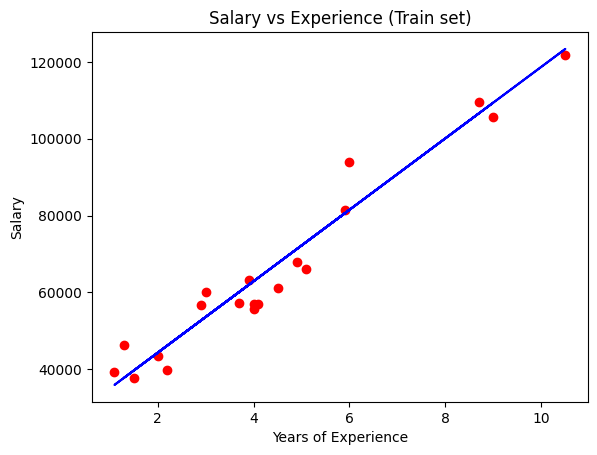

[9403.81578456] [23915.90320863]


In [33]:
# 학습 데이터셋을 시각화한다(빨간색).
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
print(w_1, w_0)

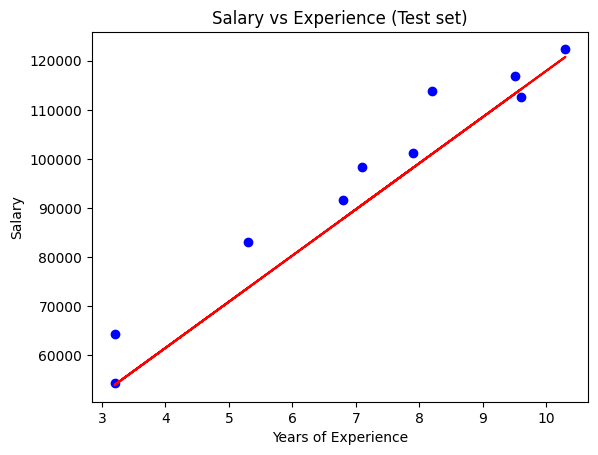

[9403.81578456] [23915.90320863]


In [34]:
# 테스트 데이터셋을 시각화한다(파란색).
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, [(w_1 * x + w_0) for x in X_test], color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
print(w_1, w_0)